In [370]:
import tensorflow as tf
tf.get_logger().setLevel('ERROR')
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import numpy as np
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, Dropout
from art.utils import preprocess, to_categorical
from art.estimators.classification import KerasClassifier
from art.attacks.poisoning import PoisoningAttackBackdoor, PoisoningAttackCleanLabelBackdoor
from art.attacks.poisoning.perturbations import add_pattern_bd 
from art.defences.trainer import AdversarialTrainerMadryPGD
from matplotlib import pyplot as plt

/home/mateusz/anaconda3/envs/cv/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [371]:
dataset = keras.datasets.cifar10.load_data()

/home/mateusz/anaconda3/envs/cv/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [372]:
def load_part_of_data(datset, train_size, test_size):
    X_train = dataset[0][0][:train_size]
    y_train = dataset[0][1][:train_size]

    X_test= dataset[1][0][:test_size]
    y_test= dataset[1][1][:test_size]
    
    return (X_train, y_train), (X_test, y_test)   

/home/mateusz/anaconda3/envs/cv/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [373]:
(X_train, y_train), (X_test, y_test) = load_part_of_data(dataset, 5000, 1000)

In [374]:
labels = {
    0: "airplane",
    1: "automobile",
    2: "bird",
    3: "cat",
    4: "deer",
    5: "dog",
    6: "frog",
    7: "horse",
    8: "ship",
    9: "truck"
}

In [375]:
def get_label(categorical_vector):
    index = np.where(categorical_vector == 1)[0][0]
    return labels[index]

In [376]:
def pick_randoms_to_poison(how_many, X_vec, Y_vec):
    random_indexes = np.random.choice(X_vec.shape[0], how_many)
    return X_vec[random_indexes], Y_vec[random_indexes] 

In [377]:
Xt_randoms, yt_randoms = pick_randoms_to_poison(100, X_train, y_train)

In [378]:
X_train,y_train = preprocess(Xt_randoms, yt_randoms)

In [379]:
X_test, y_test = preprocess(X_test, y_test)

In [380]:
def shuffle(array1, array2):
    length = array2.shape[0]
    shuffled_indices = np.arange(length)
    np.random.shuffle(shuffled_indices)
    array1 = array1[shuffled_indices]
    array2 = array2[shuffled_indices]
    
    return array1, array2 

/home/mateusz/anaconda3/envs/cv/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [381]:
# data shuffle
X_train, y_train = shuffle(X_train, y_train)
X_test, y_test = shuffle(X_test, y_test)

/home/mateusz/anaconda3/envs/cv/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [382]:
def plot_it(x, y, index):
    plt.matshow(x[index])
    plt.xlabel(get_label(y[index]), size=30)

/home/mateusz/anaconda3/envs/cv/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [383]:
backdoor = PoisoningAttackBackdoor(add_pattern_bd)
example_target = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1])
pdata, plabels = backdoor.poison(X_test, y=example_target)

/home/mateusz/anaconda3/envs/cv/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [384]:
plabels.shape

/home/mateusz/anaconda3/envs/cv/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(10,)

/home/mateusz/anaconda3/envs/cv/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 0, 'frog')

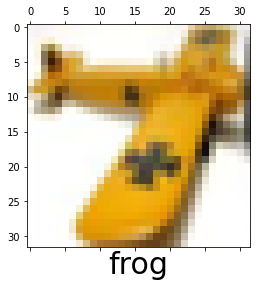

In [385]:
plt.matshow(pdata[6])
plt.xlabel(labels[6], size=30)

In [386]:
# we decide to attack truck
target = to_categorical([9], 10)[0]
get_label(target)

/home/mateusz/anaconda3/envs/cv/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'truck'

In [387]:
def get_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=X_train.shape[1:]))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

/home/mateusz/anaconda3/envs/cv/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [388]:
X_train.shape

/home/mateusz/anaconda3/envs/cv/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(100, 32, 32, 3)

In [389]:
# tf.python.framework.ops.disable_eager_execution()
model = KerasClassifier(get_model())
proxy = AdversarialTrainerMadryPGD(
    KerasClassifier(get_model()), 
    nb_epochs=10, 
    eps=0.15, 
    eps_step=0.001
)
proxy.fit(X_train, y_train)



/home/mateusz/anaconda3/envs/cv/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [390]:
attack = PoisoningAttackCleanLabelBackdoor(
    backdoor=backdoor, 
    proxy_classifier=proxy.get_classifier(),
    target=target, 
    pp_poison=0.33,
    norm=2, 
    eps=5,
    eps_step=0.1, 
    max_iter=200
)




/home/mateusz/anaconda3/envs/cv/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [391]:
pdata, plabels = attack.poison(X_train, y_train)

/home/mateusz/anaconda3/envs/cv/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/home/mateusz/anaconda3/envs/cv/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


10
Label: truck


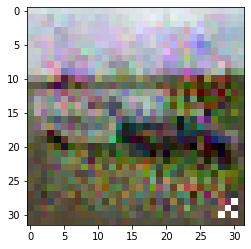

In [395]:
poisoned = pdata[np.all(plabels == target, axis=1)]
poisoned_labels = plabels[np.all(plabels == target, axis=1)]
print(len(poisoned))
idx = 0
plt.imshow(poisoned[idx].squeeze())
print(f"Label: {labels[np.argmax(poisoned_labels[idx])]}")

In [396]:
model.fit(pdata, plabels, nb_epochs=10)

/home/mateusz/anaconda3/envs/cv/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Epoch 1/10
1/1 [==============================] - 0s 2ms/step - batch: 0.0000e+00 - size: 128.0000 - loss: 2.3337 - accuracy: 0.0781
Epoch 2/10
1/1 [==============================] - 0s 2ms/step - batch: 0.0000e+00 - size: 128.0000 - loss: 2.2817 - accuracy: 0.1719
Epoch 3/10
1/1 [==============================] - 0s 2ms/step - batch: 0.0000e+00 - size: 128.0000 - loss: 2.2935 - accuracy: 0.1406
Epoch 4/10
1/1 [==============================] - 0s 1ms/step - batch: 0.0000e+00 - size: 128.0000 - loss: 2.0755 - accuracy: 0.2656
Epoch 5/10
1/1 [==============================] - 0s 2ms/step - batch: 0.0000e+00 - size: 128.0000 - loss: 2.2151 - accuracy: 0.1875
Epoch 6/10
1/1 [==============================] - 0s 1ms/step - batch: 0.0000e+00 - size: 128.0000 - loss: 2.1643 - accuracy: 0.2500
Epoch 7/10
1/1 [==============================] - 0s 998us/step - batch: 0.0000e+00 - size: 128.0000 - loss: 2.1118 - accuracy: 0.2578
Epoch 8/10
1/1 [==============================] - 0s 2ms/step - bat


Clean test set accuracy: 16.90%


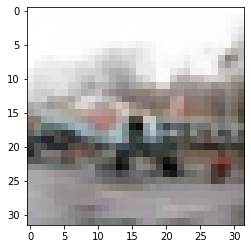

Prediction: 1


In [398]:
clean_preds = np.argmax(model.predict(X_test), axis=1)
clean_correct = np.sum(clean_preds == np.argmax(y_test, axis=1))
clean_total = y_test.shape[0]

clean_acc = clean_correct / clean_total
print("\nClean test set accuracy: %.2f%%" % (clean_acc * 100))

# Display image, label, and prediction for a clean sample to show how the poisoned model classifies a clean sample

c = 0 # class to display
i = 0 # image of the class to display

c_idx = np.where(np.argmax(y_test, 1) == c)[0][i] # index of the image in clean arrays

plt.imshow(X_test[c_idx].squeeze())
plt.show()
clean_label = c
print("Prediction: " + str(clean_preds[c_idx]))

/home/mateusz/anaconda3/envs/cv/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Poison test set accuracy: 16.90%


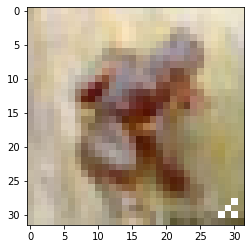

Prediction: frog


In [401]:
not_target = np.logical_not(np.all(y_test == target, axis=1))
px_test, py_test = backdoor.poison(X_test[not_target], y_test[not_target])
poison_preds = np.argmax(model.predict(px_test), axis=1)
clean_correct = np.sum(poison_preds == np.argmax(y_test[not_target], axis=1))
clean_total = y_test.shape[0]

clean_acc = clean_correct / clean_total
print("\nPoison test set accuracy: %.2f%%" % (clean_acc * 100))

c = 0 # index to display
plt.imshow(px_test[c].squeeze())
plt.show()
clean_label = c
print("Prediction: " + str(labels[poison_preds[c]]))